# MATH 360 Mathematical Modelling 2
#### Team members: Bredan Sunderland, Kevin Wen, Reynaldi Aditama, and Tianyu Su

***

<br>

In [8]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as spi
from sklearn.preprocessing import MinMaxScaler

In [3]:
# get data from csv

customer_df = pd.read_csv('customer.csv')
weather_df = pd.read_csv('vancouver_weather.csv')

<br>

## 1. Problem Statement

Make a mathematical model regarding the total annual revenue of Blue Chip Cafe based on temperature, precipitation, and customer frequency data from 1997 to 2022.

<br>

## 2. Variables and Parameters

| Description | Symbol | Dimension | Type |
| :---: | :---: | :---: | :---: |
| Average temperature per month | $T$ | <sup>o</sup>$C$ | dependant variable |
| Average precipitation per month | $P$ | $mm$ | dependant variable |
| Average customer per month | $C_0$ | 1 | dependant variable |
| Average of temperature from 1997 to 2022 | $T_0$ | <sup>o</sup>$C$ | dependant variable |
| Average of precipitation from 1997 to 2022 | $P_0$ | $mm$ | dependant variable |
| Rate of change of customers with respect to temperature | $a$ | 1 | parameter |
| Rate of change of customers with respect to precipitation | $b$ | 1 | parameter |
| Average spending per customer | $z$ | \$ | dependant variable |
| Percentage of operational cost per month | $c$ | 1 | parameter |
| Percentage of unexpected cost per month | $e$ | 1 | random variable |
| Revenue per month from 1997 to 2022 | $R_m$ | \$ | independent variable |
| Revenue per year from 1997 to 2022 | $R_y$ | \$ | independent variable |

<br>

## 3. Assumptions and Constraints

- customer frequency stays the same (January 1997 - December 2022)
- average spending customer per month stays the same (January 1997 - December 2022)
- operational cost is 20% of total sales
- randomness of customers and unexpected costs follow normal distribution
- unexpected cost is to cover unexpected things like something broken or leaking or other accident (3% - 10% of total sales)

<br>

## 4. Build Solutions

In [4]:
C0 = np.sum(customer_df.Monthly_Frequency_Customers)
T0 = weather_df.avg_temperature.mean()
P0 = weather_df.precipitation.mean()
a = 1.5  # CHANGE LATER
b = 0.5  # CHANGE LATER
T = []
P = [] 
z = 12  # CHANGE LATER, Search from Blue Chip Cafe prices
c = 0.2  # CHANGE LATER
e = 0.1  # CHANGE LATER

years = [1997 + i for i in range(26)]
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

# finding the avg_temp and precipitation per month
def find_T_P():
    for i in years:
        for j in month:
            filter = 'year == ' + str(i) + ' & month == ' + str(j)
            filter_temp = weather_df.query(filter)['avg_temperature']
            filter_pre = weather_df.query(filter)['precipitation']
            T.append(filter_temp.mean())
            P.append(filter_pre.mean())
    
# finding the number of customers per month, almost impossible to go below zero since we calculated on a monthly basis not daily
def num_of_customers_per_month():
    return C0 + a * (T - T0) - b * (P - P0)

find_T_P()

In [5]:
n = num_of_customers_per_month()
n_std = np.std(n)

# adjusted n with its randomness
n_adjusted = np.array([stats.norm.rvs(loc=i, scale=n_std, size=1) for i in n]).flatten()

def revenue_per_month():
    return n_adjusted * z * (1 - c) * (1 - stats.norm.rvs(loc=0, scale=e, size=1))

<br>

## 5. Analyze and Assess

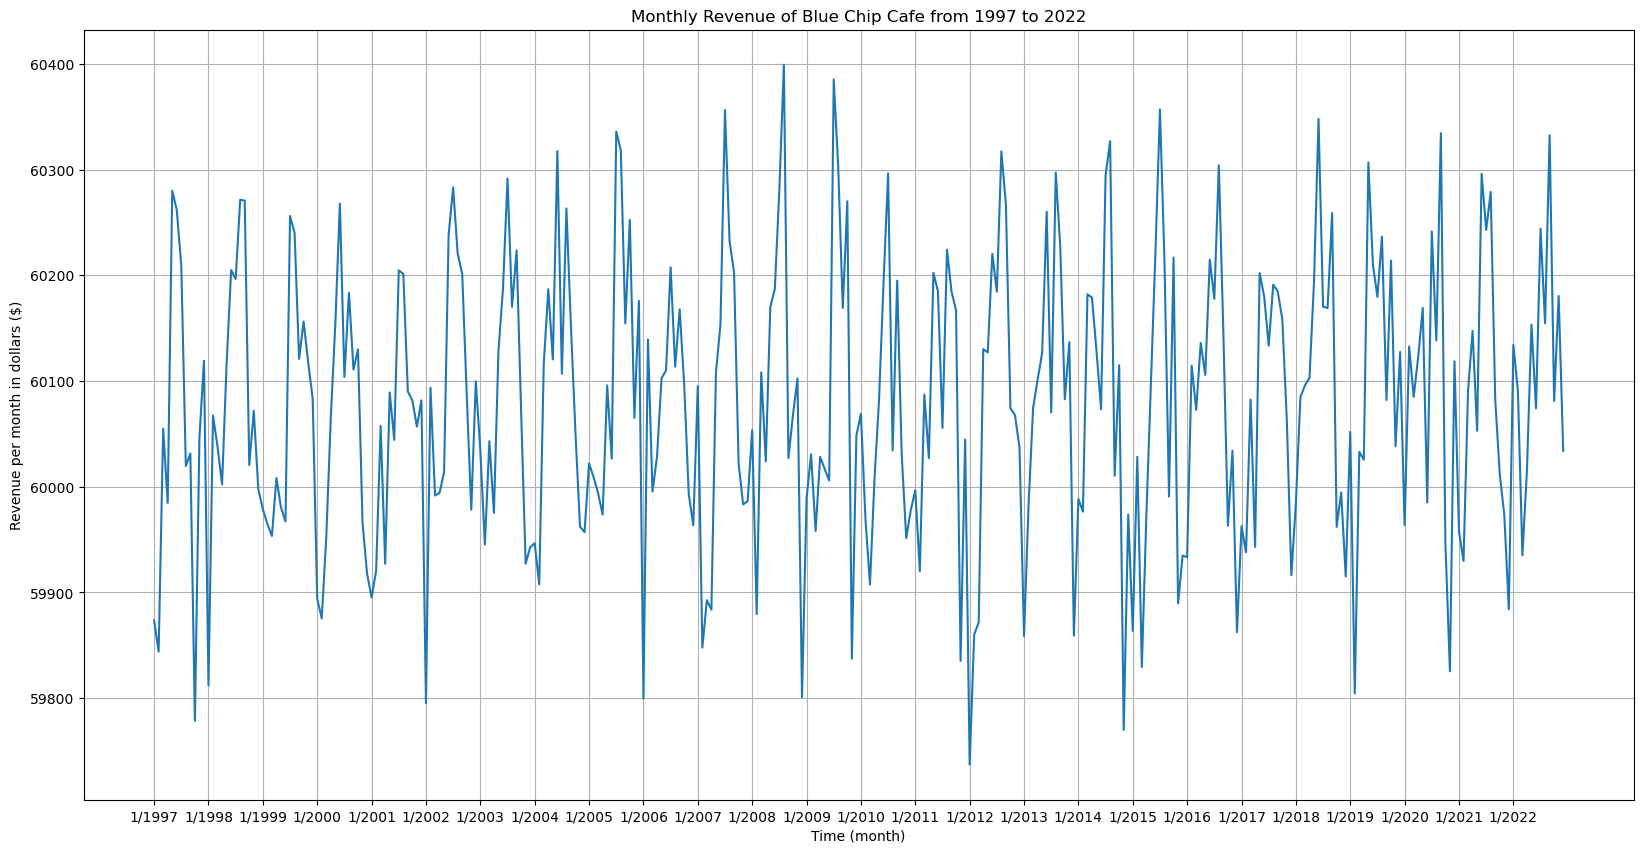

In [13]:
Rm = revenue_per_month()
Ry = []
x_month = []

for i in range(len(years)):
    Ry.append(Rm[i * 12] + Rm[i * 12 + 1] + Rm[i * 12 + 2] + Rm[i * 12 + 3] + Rm[i * 12 + 4] + Rm[i * 12 + 5] + Rm[i * 12 + 6] + Rm[i * 12 + 7] + Rm[i * 12 + 8] + Rm[i * 12 + 9] + Rm[i * 12 + 10] + Rm[i * 12 + 11])

for i in years:
    for j in month:
        x_month.append(str(j) + '/' + str(i))

plt.figure(figsize=(20, 10))
plt.plot(x_month, Rm)
plt.xlabel('Time (month)')
plt.ylabel('Revenue per month in dollars ($)')
plt.title('Monthly Revenue of Blue Chip Cafe from 1997 to 2022')
plt.xticks([i * 12 for i in range(len(years))])
plt.grid(True)
plt.show()

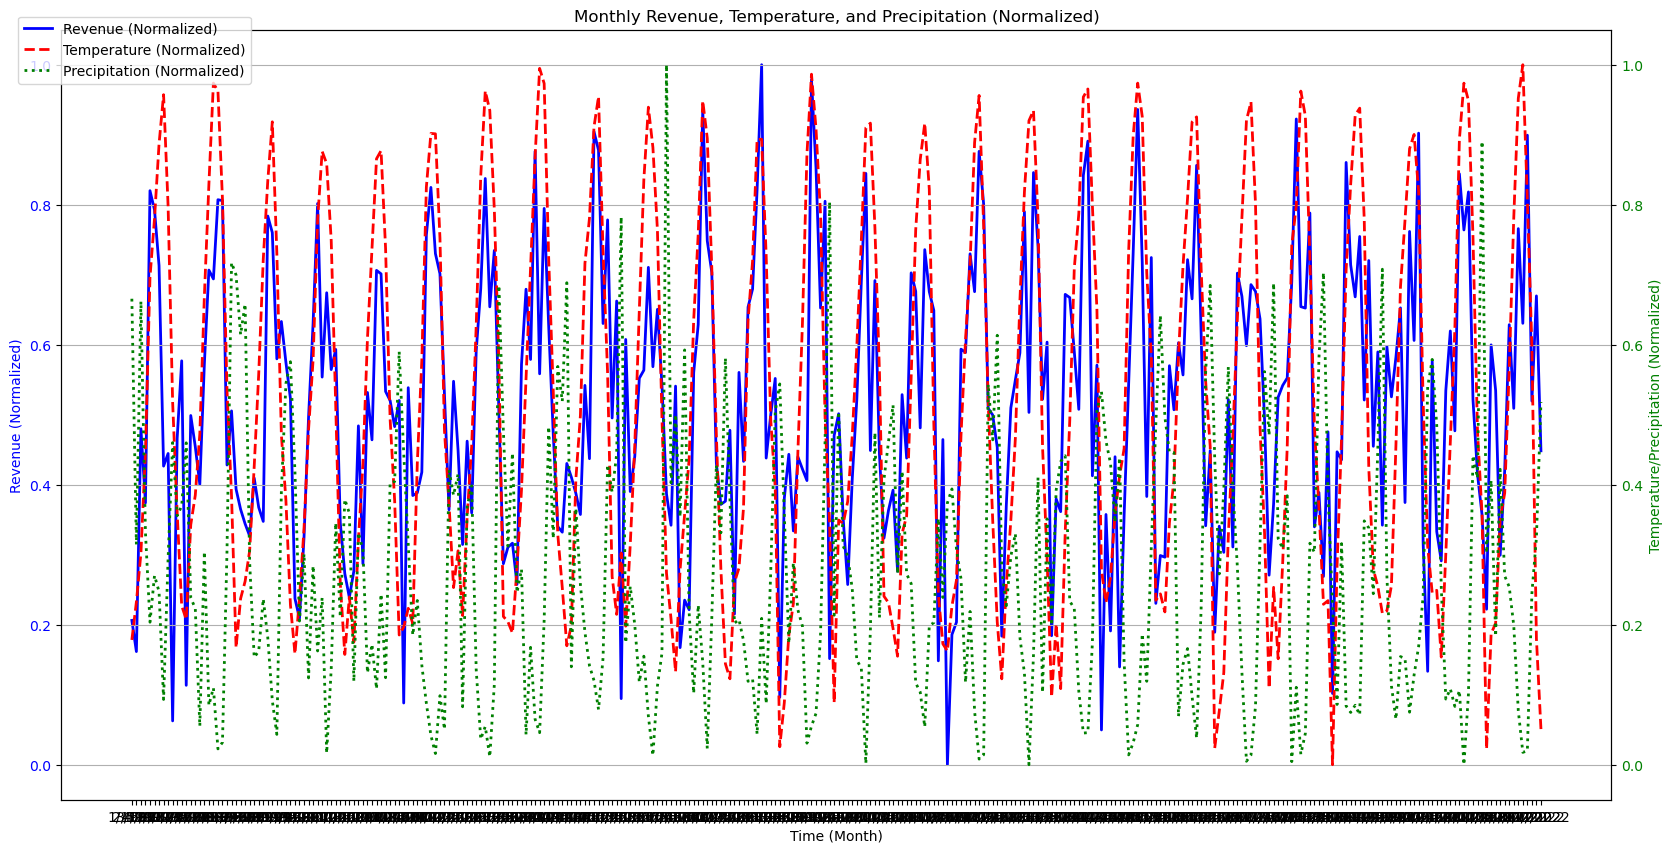

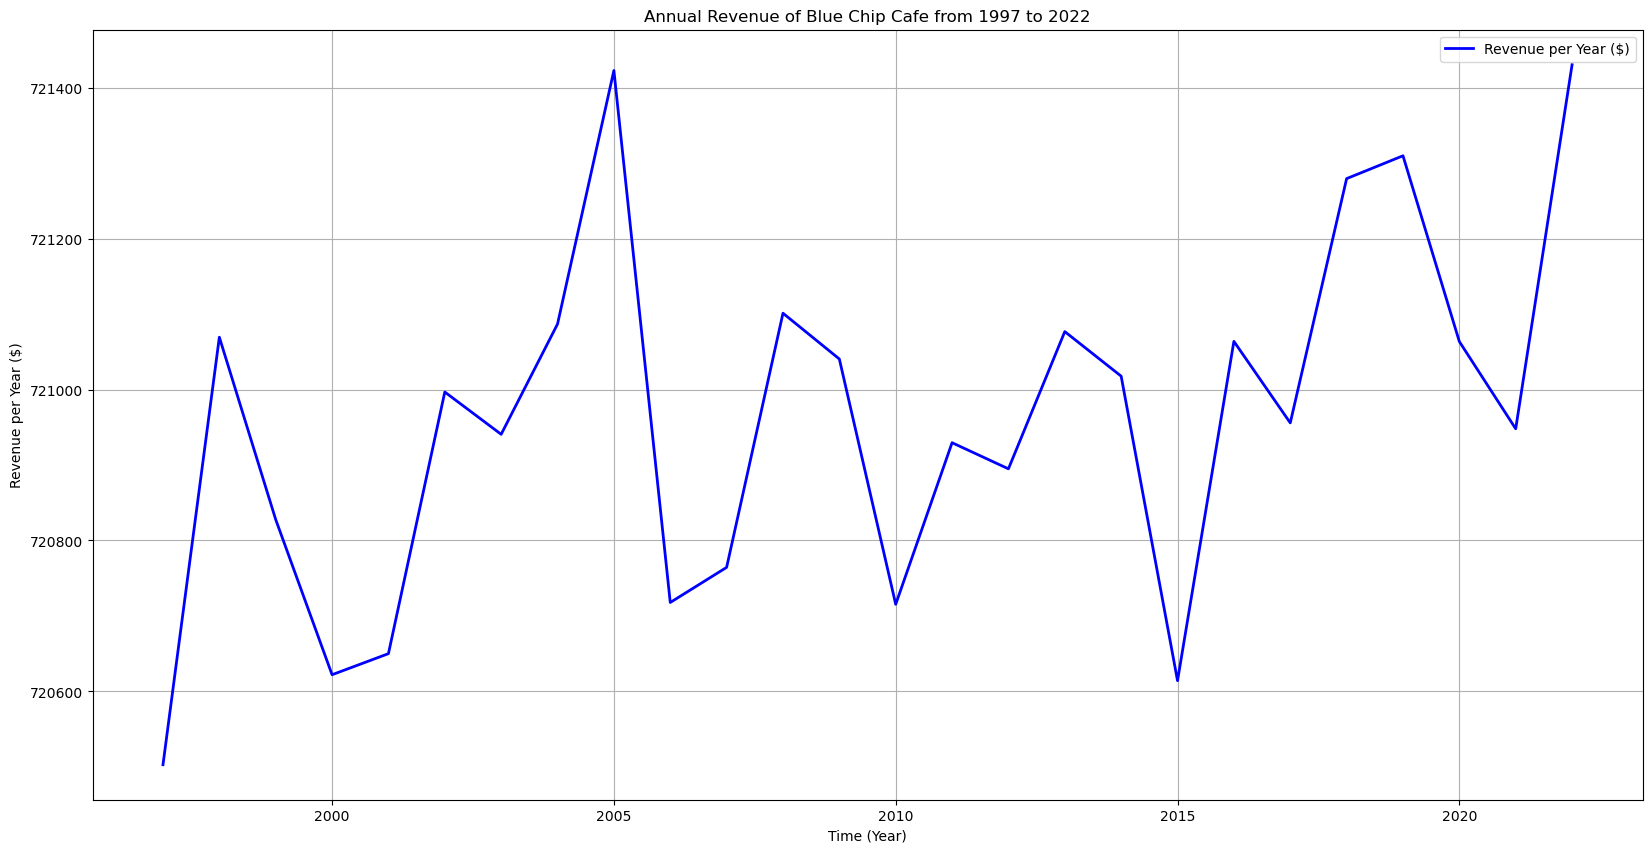

In [15]:
# Normalize all data
scaler = MinMaxScaler()
Rm_normalized = scaler.fit_transform(np.array(Rm).reshape(-1, 1)).flatten()
T_normalized = scaler.fit_transform(np.array(T).reshape(-1, 1)).flatten()
P_normalized = scaler.fit_transform(np.array(P).reshape(-1, 1)).flatten()

# Create a dual-axis plot for normalized revenue, temperature, and precipitation
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot normalized revenue on the primary axis
ax1.plot(x_month, Rm_normalized, label="Revenue (Normalized)", color="blue", linewidth=2)
ax1.set_xlabel("Time (Month)")
ax1.set_ylabel("Revenue (Normalized)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Add a secondary axis for temperature and precipitation
ax2 = ax1.twinx()
ax2.plot(x_month, T_normalized, label="Temperature (Normalized)", color="red", linestyle="--", linewidth=2)
ax2.plot(x_month, P_normalized, label="Precipitation (Normalized)", color="green", linestyle=":", linewidth=2)
ax2.set_ylabel("Temperature/Precipitation (Normalized)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.title("Monthly Revenue, Temperature, and Precipitation (Normalized)")
plt.grid(True)
plt.show()

# Plot annual revenue separately
plt.figure(figsize=(20, 10))
plt.plot(years, Ry, label="Revenue per Year ($)", color="blue", linewidth=2)
plt.xlabel("Time (Year)")
plt.ylabel("Revenue per Year ($)")
plt.title("Annual Revenue of Blue Chip Cafe from 1997 to 2022")
plt.legend()
plt.grid(True)
plt.show()


<br>

## 6. Results

According to the graph above:\
Monthly Revenue of Blue Chip Cafe always reach highest in the mid of the year and the lowest of it was happened at the end of the year. It seen like revenue would be increase in summer section which is high temperture weather, and decrease in winter section with colder weather and higher precipitation. This might be cold drinks are more popular in summer section, but the frequency of costomer is decrease in winter because of cold weather.\
For Annual Revenue, the variation is vary large, it depend on choosing the random sample. \
In conclusion:\
Since the revenue would increase in summer which with high temperature, which means during this time, Blue Chip Cafe could hired more employee during this time and reduce the waiting time and increase the costomers frequency. Also, in winter, the number of employee could be decrease
